<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/Agglomerative_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X=np.array([[5,3],[10,15],[15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91]])

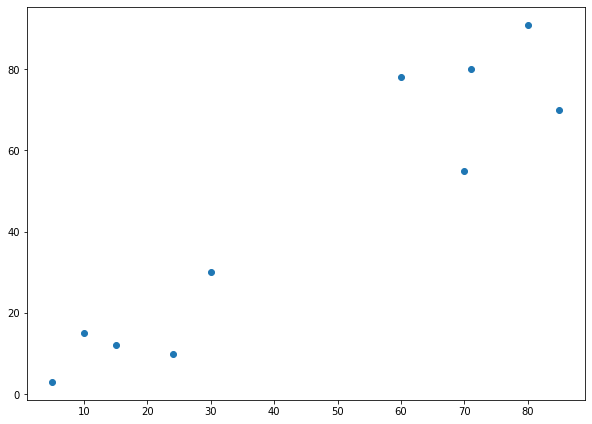

In [ ]:
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')#two dimension in array X like [5,3]
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage#dendrogram for the points

In [ ]:
linked=linkage(X,'single')#minimum distance similarity linkage

In [ ]:
labellist=range(1,11)#array have 10 points used in x-axis of dendrogram like 1 for 1st point [5,3]

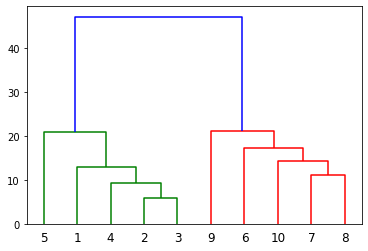

In [ ]:
dendrogram(linked,orientation='top',labels=labellist,show_leaf_counts=True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')#affinity=distance measure
cluster_labels=cluster.fit_predict(X)
#print(cluster_labels)
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


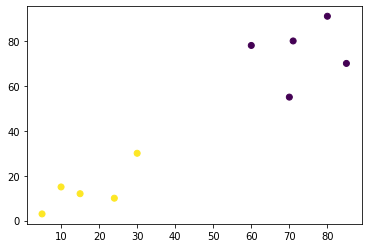

In [ ]:
plt.scatter(X[:,0],X[:,1],c=cluster_labels)#cmap=rainbow for colors and c=cluster_labels-same points same color

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhoutte_scr=silhouette_score(X,cluster_labels)
print("For n_clusters =",2,
      "Average Silhoutte Score =", silhoutte_scr)

For n_clusters = 2 Average Silhoutte Score = 0.7485057741241999


In [ ]:
#Example-2
from google.colab import files
uploaded=files.upload()

Saving shopping_data.csv to shopping_data.csv


In [ ]:
import io
customer_data=pd.read_csv(io.StringIO(uploaded['shopping_data.csv'].decode('utf-8')))

In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data=customer_data.iloc[:,3:5].values

In [ ]:
import scipy.cluster.hierarchy as shc

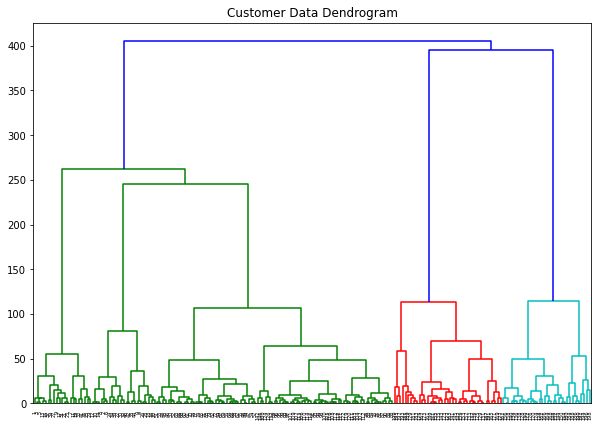

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Customer Data Dendrogram")
dend=shc.dendrogram(shc.linkage(data,method='ward'))

In [ ]:
cluster1=AgglomerativeClustering(n_clusters=5,linkage='ward')
cluster1.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

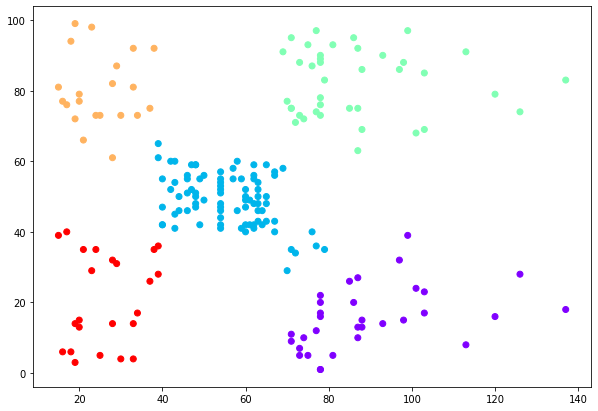

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=cluster1.labels_,cmap='rainbow')#cmap=gray,jet,viridis

In [ ]:
silhoutte_scr=silhouette_score(data,cluster1.labels_)
print("For n_clusters =",5,
      "Average Silhoutte Score =", silhoutte_scr)
#score is less because clusters are not so compact..points are much far in the clusters

For n_clusters = 5 Average Silhoutte Score = 0.5529945955148897


In [ ]:
#Example-3
from sklearn.datasets import make_moons
X,y=make_moons(200,noise=0.05,random_state=0) 

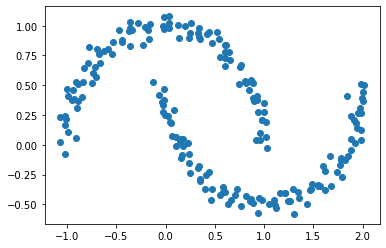

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.cluster import KMeans

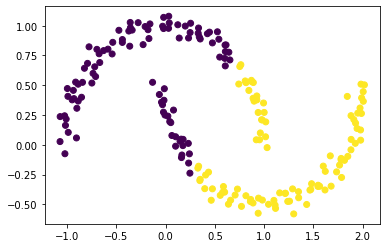

In [ ]:
model=KMeans(2)
model.fit(X)
plt.scatter(X[:,0],X[:,1],c=model.labels_)#not good for arbitrary points

In [ ]:
from sklearn.cluster import DBSCAN

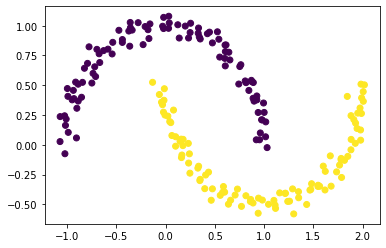

In [ ]:
model1=DBSCAN(eps=0.3)#eps=epsilon gives neighborhood of points 
model1.fit(X)
plt.scatter(X[:,0],X[:,1],c=model1.labels_)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

For n_clusters = 2 Average Silhoutte Score = 0.4759674522921361 for moons


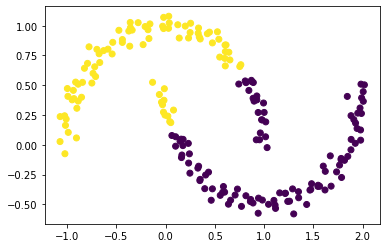

In [ ]:
cluster2=AgglomerativeClustering(n_clusters=2,linkage='complete')
cluster2_labels=cluster2.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=cluster2_labels)

silhouette_scr=silhouette_score(X,cluster2.labels_)
print("For n_clusters =",2,
      "Average Silhoutte Score =", silhouette_scr,"for moons")

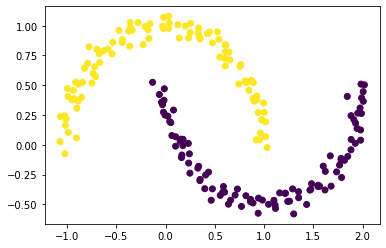

In [ ]:
cluster2=AgglomerativeClustering(n_clusters=2,linkage='single')
cluster2_labels=cluster2.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=cluster2_labels)

In [ ]:
silhouette_scr=silhouette_score(X,cluster2.labels_)
print("For n_clusters =",2,
      "Average Silhouette Score =", silhouette_scr,"for moons")

For n_clusters = 2 Average Silhouette Score = 0.32585318950197517 for moons
